## **Data Cleaning And EDA**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Category 1 Sports & Outdoors**

In [14]:
# --- STEP 1: Load & Clean Data ---
file_name = "./banggood_sports_&_outdoor_data.csv"
df = pd.read_csv(file_name)

print(f"Original Data Size: {df.shape}")

# 1. Remove 'Category' and 'Rating' Columns if they exist
cols_to_drop = ['Category', 'Rating']
df.drop(columns=[c for c in cols_to_drop if c in df.columns], inplace=True)

# 2. Price Cleaning (Remove currency symbols like $, US, £, and commas)
# 'coerce' turns invalid parsing into NaN
df['Price'] = df['Price'].astype(str).str.replace('US', '').str.replace('$', '').str.replace(',', '').str.replace('£', '')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# 3. Reviews Cleaning (Extract digits only)
df['Reviews'] = df['Reviews'].astype(str).str.extract(r'(\d+)').astype(float).fillna(0)

# 4. Remove Empty Rows (Drop rows where Price is missing)
df.dropna(subset=['Price'], inplace=True)

# 5. Feature Engineering (Create 2 New Columns)
# Feature A: Price Segment (Budget vs Premium)
def categorize_price(p):
    if p < 50: return 'Low Budget'
    elif p < 150: return 'Mid Range'
    else: return 'Premium'

df['Price_Segment'] = df['Price'].apply(categorize_price)

# Feature B: Estimated Revenue (Price * Review Count)
df['Est_Revenue'] = df['Price'] * df['Reviews']

# --- SAVE BACK TO SAME FILE (Overwrite) ---
df.to_csv(file_name, index=False)
print(f"Success! '{file_name}' has been updated with cleaned data.")
print(f"New Data Size: {df.shape}")
print("-" * 30)

Original Data Size: (88, 7)
Success! './banggood_sports_&_outdoor_data.csv' has been updated with cleaned data.
New Data Size: (88, 6)
------------------------------


In [15]:
df.head()

,URL,Name,Price,Reviews,Price_Segment,Est_Revenue
0,https://www.banggood.com/MO-FLY-P-51D-Mustang-...,MO-FLY P-51D Mustang 1/16 Scale 685mm Wingspan...,135.99,4.0,Mid Range,543.96
1,https://www.banggood.com/BlitzWolf-BW-AG1-Pro-...,BlitzWolf BW-AG1 Pro AI Smart Glasses with HD ...,52.99,4.0,Mid Range,211.96
2,https://www.banggood.com/BlitzWolf-BW-FYE17-bl...,BlitzWolf® BW-FYE17 bluetooth Earphone 2-in-1 ...,29.99,0.0,Low Budget,0.00
3,https://www.banggood.com/MCHOSE-K7-Ultra-Wirel...,MCHOSE K7 Ultra Wireless Mouse Tri-mode PAW395...,86.99,0.0,Mid Range,0.00
4,https://www.banggood.com/Ninkear-S14-Laptop-14...,Ninkear S14 Laptop 14 Inch 2.2K Screen AMD Ryz...,619.99,13.0,Premium,8059.87


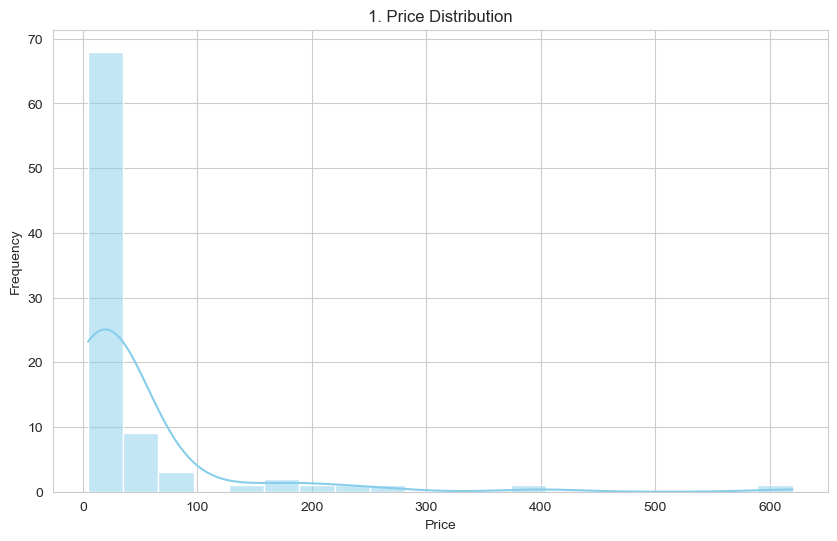

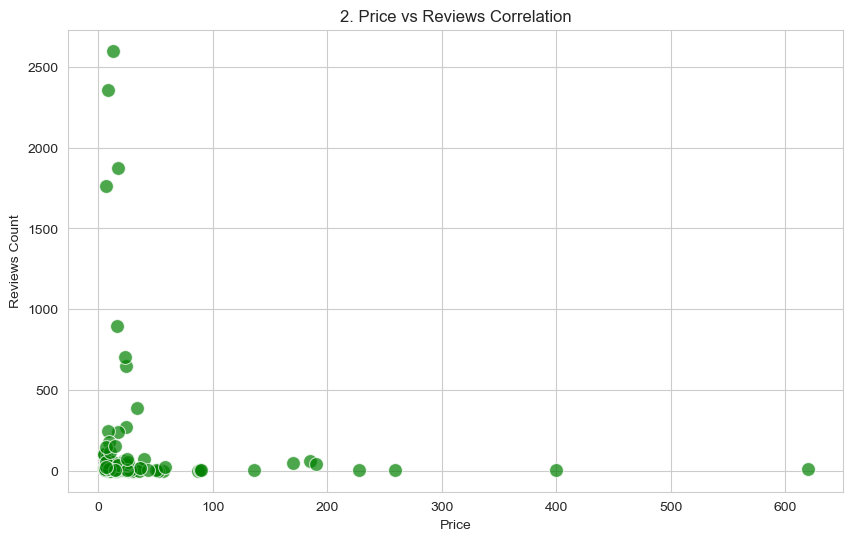

C:\Users\USER\AppData\Local\Temp\ipykernel_10824\3036953788.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Reviews', y='Name', data=top_5, palette='viridis')


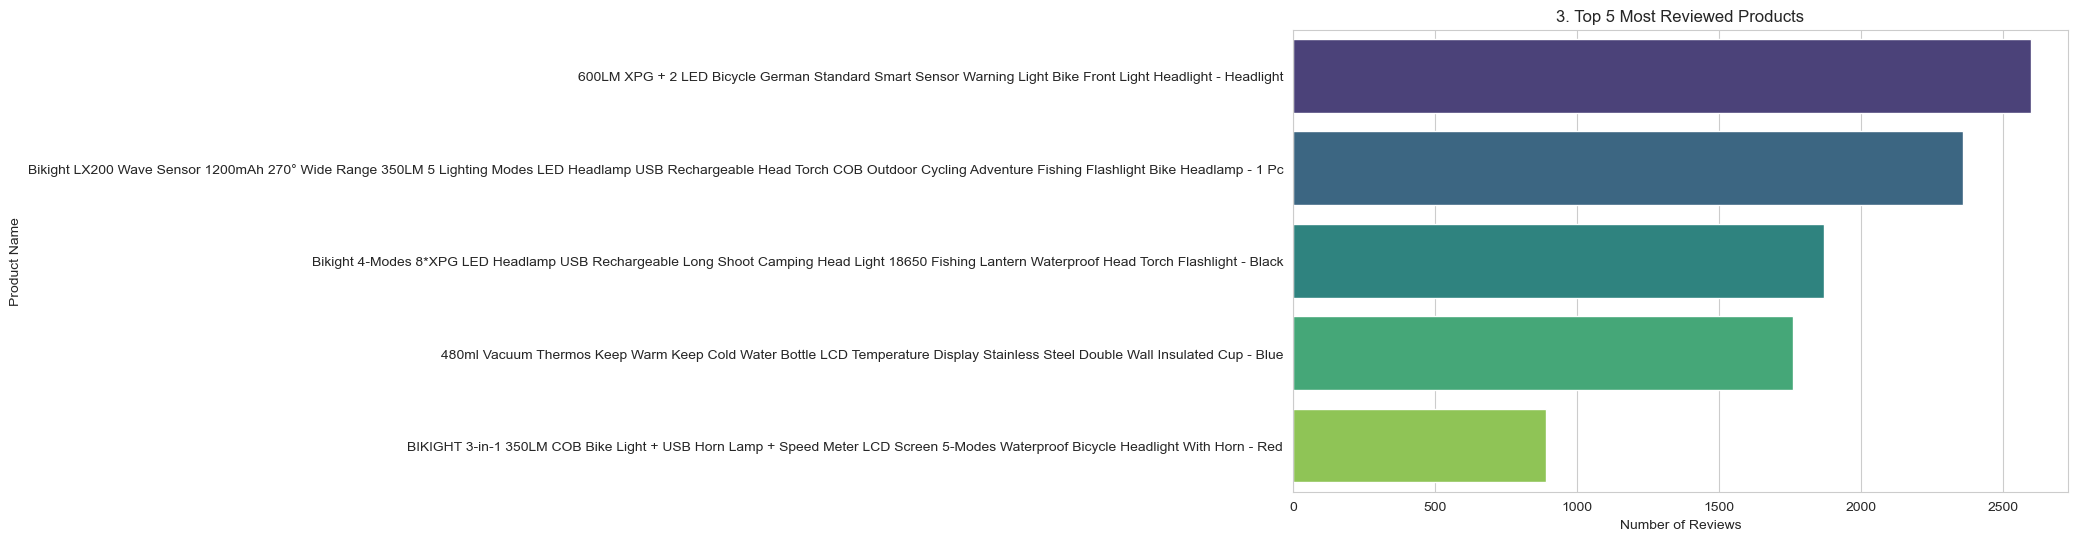

C:\Users\USER\AppData\Local\Temp\ipykernel_10824\3036953788.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Price_Segment', data=df, palette='pastel', order=['Low Budget', 'Mid Range', 'Premium'])


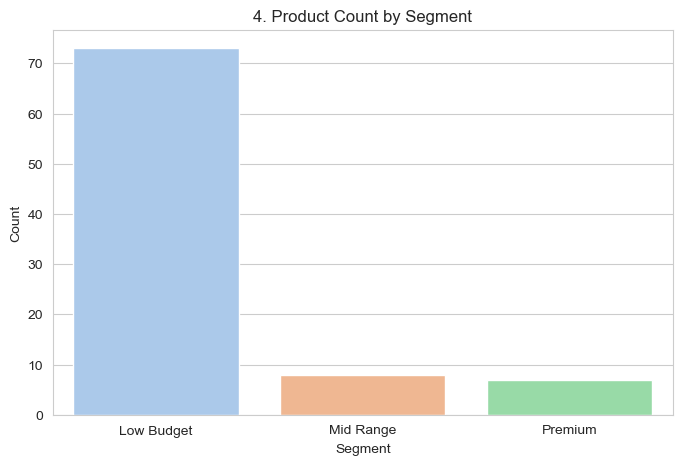

C:\Users\USER\AppData\Local\Temp\ipykernel_10824\3036953788.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Price_Segment', y='Est_Revenue', data=df, estimator=sum, palette='magma', errorbar=None)


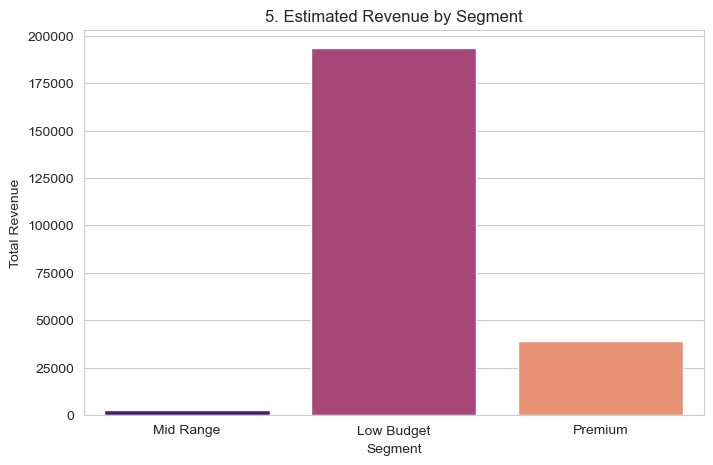

In [16]:
# --- STEP 2
sns.set_style("whitegrid")

# Graph 1: Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=20, kde=True, color='skyblue')
plt.title('1. Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Graph 2: Price vs Reviews Correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Reviews', data=df, color='green', s=100, alpha=0.7)
plt.title('2. Price vs Reviews Correlation')
plt.xlabel('Price')
plt.ylabel('Reviews Count')
plt.show()

# Graph 3: Top 5 Most Reviewed Products
plt.figure(figsize=(10, 6))
top_5 = df.nlargest(5, 'Reviews')
sns.barplot(x='Reviews', y='Name', data=top_5, palette='viridis')
plt.title('3. Top 5 Most Reviewed Products')
plt.xlabel('Number of Reviews')
plt.ylabel('Product Name')
plt.show()

# Graph 4: Product Count by Price Segment
plt.figure(figsize=(8, 5))
sns.countplot(x='Price_Segment', data=df, palette='pastel', order=['Low Budget', 'Mid Range', 'Premium'])
plt.title('4. Product Count by Segment')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.show()

# Graph 5: Estimated Revenue by Segment
plt.figure(figsize=(8, 5))
sns.barplot(x='Price_Segment', y='Est_Revenue', data=df, estimator=sum, palette='magma', errorbar=None)
plt.title('5. Estimated Revenue by Segment')
plt.xlabel('Segment')
plt.ylabel('Total Revenue')
plt.show()

## **Category 2 Electronics** 

In [17]:
# --- STEP 1: Load & Clean Data ---
file_name = "./electronics_data.csv"
df = pd.read_csv(file_name)

print(f"Original Data Size: {df.shape}")

# 1. Remove 'Category' and 'Rating' Columns if they exist
cols_to_drop = ['Category', 'Rating']
df.drop(columns=[c for c in cols_to_drop if c in df.columns], inplace=True)

# 2. Price Cleaning (Remove currency symbols like $, US, £, and commas)
# 'coerce' turns invalid parsing into NaN
df['Price'] = df['Price'].astype(str).str.replace('US', '').str.replace('$', '').str.replace(',', '').str.replace('£', '')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# 3. Reviews Cleaning (Extract digits only)
df['Reviews'] = df['Reviews'].astype(str).str.extract(r'(\d+)').astype(float).fillna(0)

# 4. Remove Empty Rows (Drop rows where Price is missing)
df.dropna(subset=['Price'], inplace=True)

# 5. Feature Engineering (Create 2 New Columns)
# Feature A: Price Segment (Budget vs Premium)
def categorize_price(p):
    if p < 50: return 'Low Budget'
    elif p < 150: return 'Mid Range'
    else: return 'Premium'

df['Price_Segment'] = df['Price'].apply(categorize_price)

# Feature B: Estimated Revenue (Price * Review Count)
df['Est_Revenue'] = df['Price'] * df['Reviews']

# --- SAVE BACK TO SAME FILE (Overwrite) ---
df.to_csv(file_name, index=False)
print(f"Success! '{file_name}' has been updated with cleaned data.")
print(f"New Data Size: {df.shape}")
print("-" * 30)

Original Data Size: (147, 7)
Success! './electronics_data.csv' has been updated with cleaned data.
New Data Size: (147, 6)
------------------------------


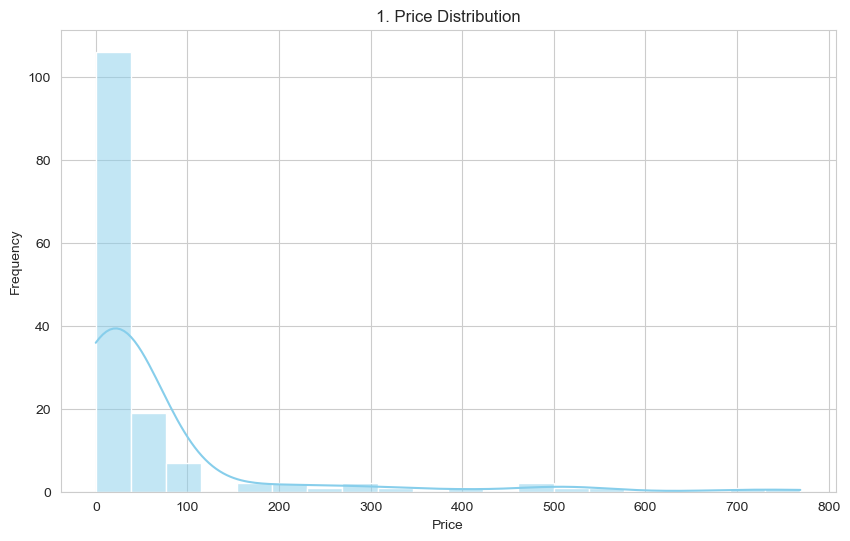

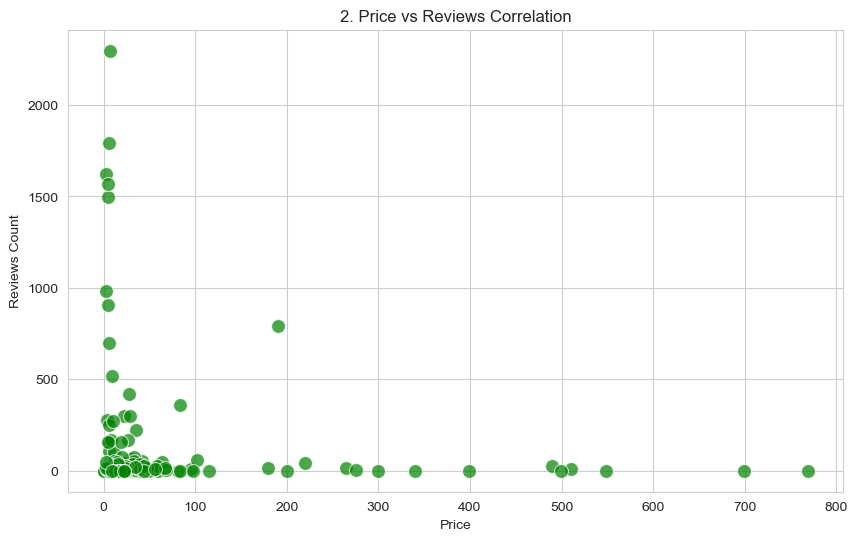

C:\Users\USER\AppData\Local\Temp\ipykernel_10824\3036953788.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Reviews', y='Name', data=top_5, palette='viridis')


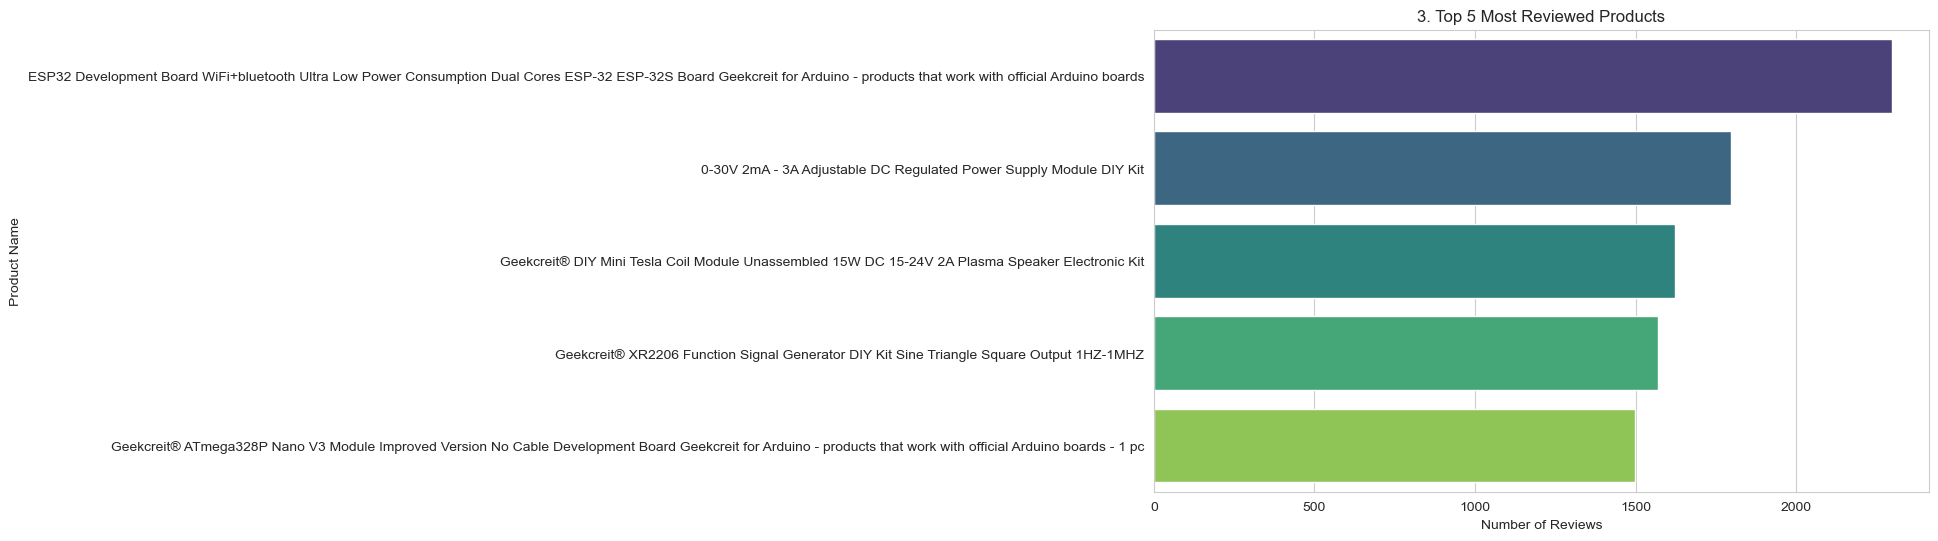

C:\Users\USER\AppData\Local\Temp\ipykernel_10824\3036953788.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Price_Segment', data=df, palette='pastel', order=['Low Budget', 'Mid Range', 'Premium'])


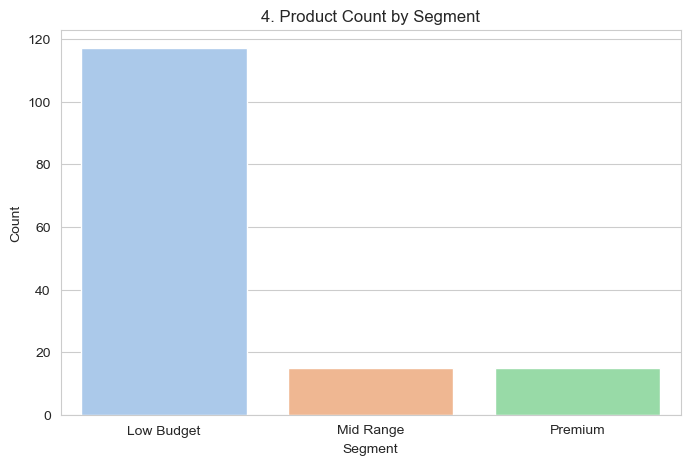

C:\Users\USER\AppData\Local\Temp\ipykernel_10824\3036953788.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Price_Segment', y='Est_Revenue', data=df, estimator=sum, palette='magma', errorbar=None)


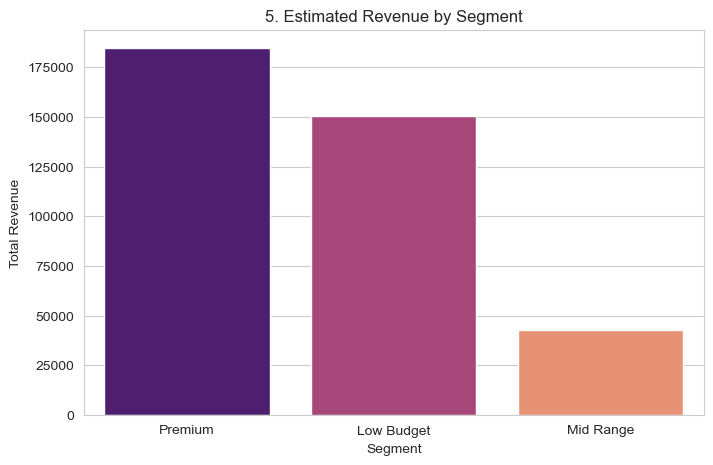

In [18]:
# --- STEP 2
sns.set_style("whitegrid")

# Graph 1: Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=20, kde=True, color='skyblue')
plt.title('1. Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Graph 2: Price vs Reviews Correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Reviews', data=df, color='green', s=100, alpha=0.7)
plt.title('2. Price vs Reviews Correlation')
plt.xlabel('Price')
plt.ylabel('Reviews Count')
plt.show()

# Graph 3: Top 5 Most Reviewed Products
plt.figure(figsize=(10, 6))
top_5 = df.nlargest(5, 'Reviews')
sns.barplot(x='Reviews', y='Name', data=top_5, palette='viridis')
plt.title('3. Top 5 Most Reviewed Products')
plt.xlabel('Number of Reviews')
plt.ylabel('Product Name')
plt.show()

# Graph 4: Product Count by Price Segment
plt.figure(figsize=(8, 5))
sns.countplot(x='Price_Segment', data=df, palette='pastel', order=['Low Budget', 'Mid Range', 'Premium'])
plt.title('4. Product Count by Segment')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.show()

# Graph 5: Estimated Revenue by Segment
plt.figure(figsize=(8, 5))
sns.barplot(x='Price_Segment', y='Est_Revenue', data=df, estimator=sum, palette='magma', errorbar=None)
plt.title('5. Estimated Revenue by Segment')
plt.xlabel('Segment')
plt.ylabel('Total Revenue')
plt.show()

## **Category 3 Automobiles & Motorcycles** 

In [19]:
# --- STEP 1: Load & Clean Data ---
file_name = "./banggood_automobiles_&_motorcycles_data.csv"
df = pd.read_csv(file_name)

print(f"Original Data Size: {df.shape}")

# 1. Remove 'Category' and 'Rating' Columns if they exist
cols_to_drop = ['Category', 'Rating']
df.drop(columns=[c for c in cols_to_drop if c in df.columns], inplace=True)

# 2. Price Cleaning (Remove currency symbols like $, US, £, and commas)
# 'coerce' turns invalid parsing into NaN
df['Price'] = df['Price'].astype(str).str.replace('US', '').str.replace('$', '').str.replace(',', '').str.replace('£', '')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# 3. Reviews Cleaning (Extract digits only)
df['Reviews'] = df['Reviews'].astype(str).str.extract(r'(\d+)').astype(float).fillna(0)

# 4. Remove Empty Rows (Drop rows where Price is missing)
df.dropna(subset=['Price'], inplace=True)

# 5. Feature Engineering (Create 2 New Columns)
# Feature A: Price Segment (Budget vs Premium)
def categorize_price(p):
    if p < 50: return 'Low Budget'
    elif p < 150: return 'Mid Range'
    else: return 'Premium'

df['Price_Segment'] = df['Price'].apply(categorize_price)

# Feature B: Estimated Revenue (Price * Review Count)
df['Est_Revenue'] = df['Price'] * df['Reviews']

# --- SAVE BACK TO SAME FILE (Overwrite) ---
df.to_csv(file_name, index=False)
print(f"Success! '{file_name}' has been updated with cleaned data.")
print(f"New Data Size: {df.shape}")
print("-" * 30)

Original Data Size: (62, 6)
Success! './banggood_automobiles_&_motorcycles_data.csv' has been updated with cleaned data.
New Data Size: (62, 6)
------------------------------


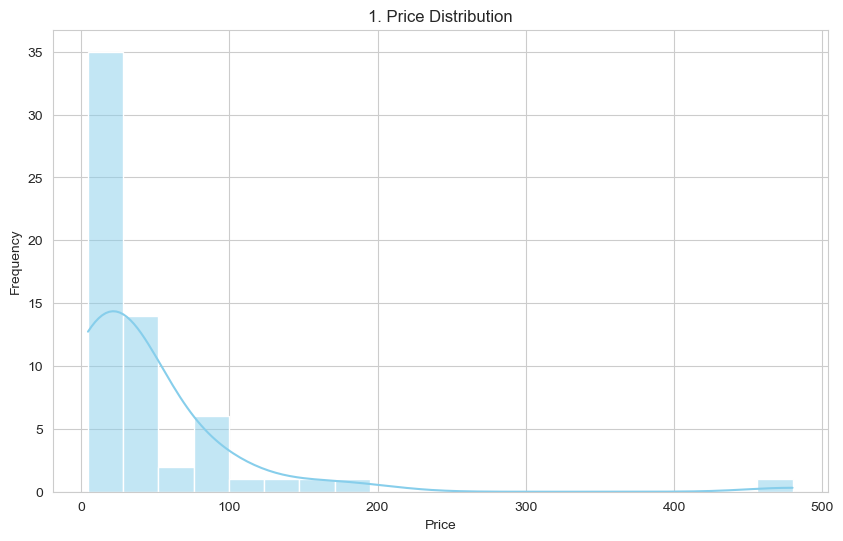

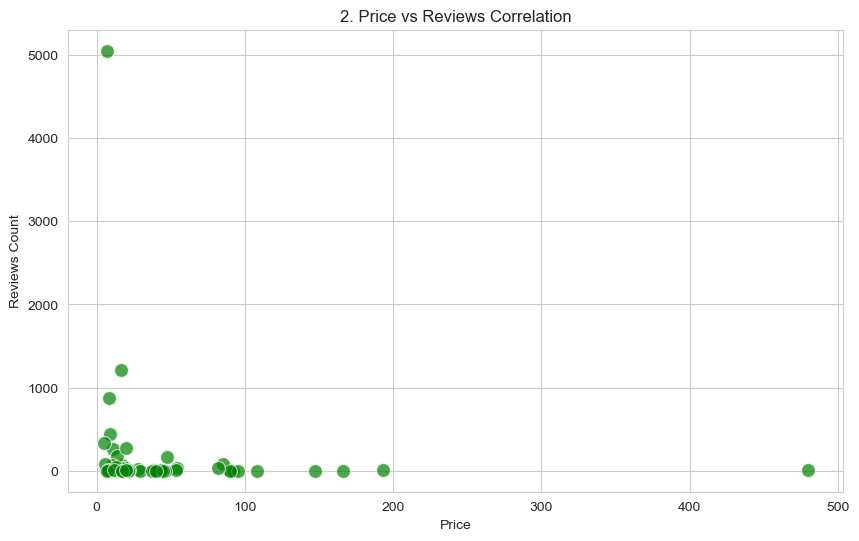

C:\Users\USER\AppData\Local\Temp\ipykernel_10824\3036953788.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Reviews', y='Name', data=top_5, palette='viridis')


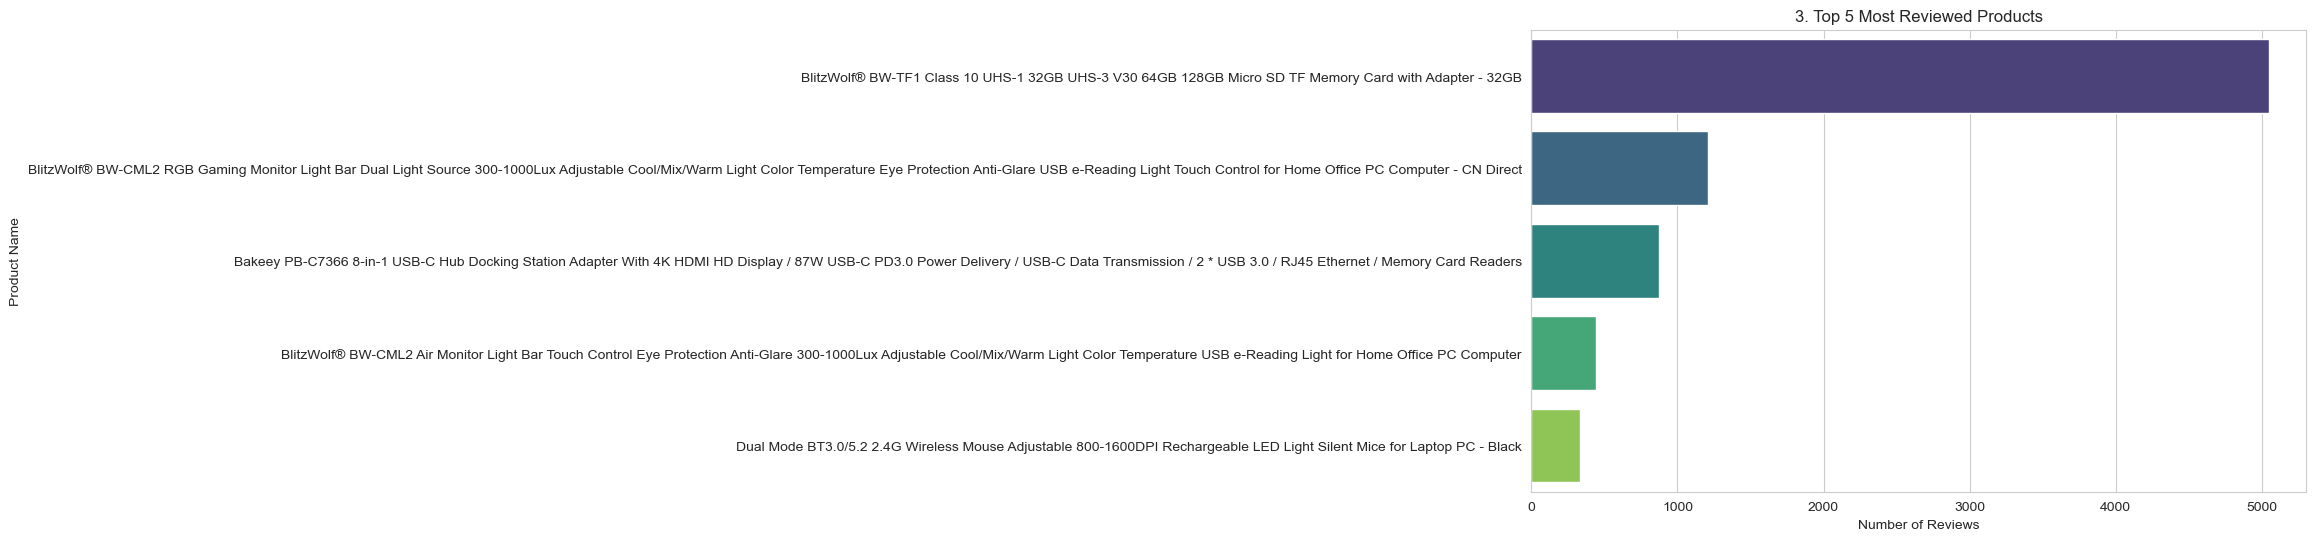

C:\Users\USER\AppData\Local\Temp\ipykernel_10824\3036953788.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Price_Segment', data=df, palette='pastel', order=['Low Budget', 'Mid Range', 'Premium'])


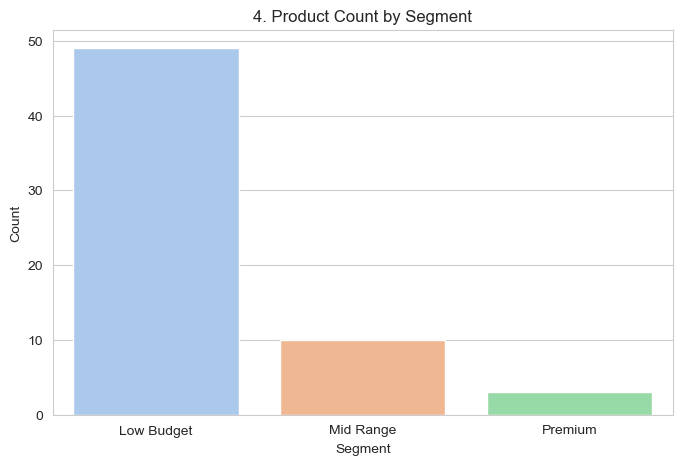

C:\Users\USER\AppData\Local\Temp\ipykernel_10824\3036953788.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Price_Segment', y='Est_Revenue', data=df, estimator=sum, palette='magma', errorbar=None)


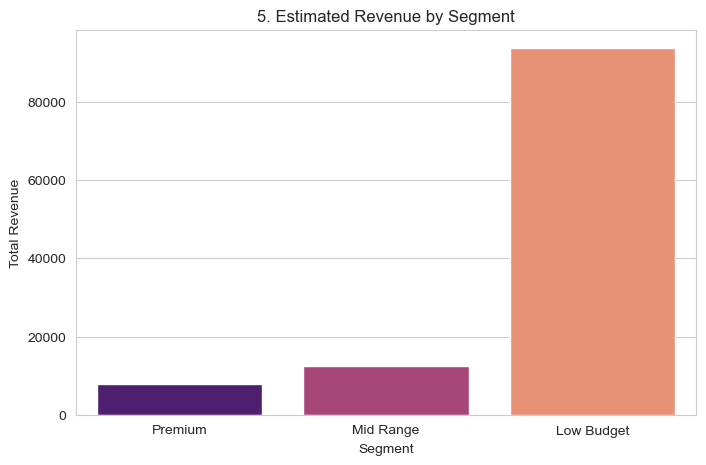

In [20]:
# --- STEP 2
sns.set_style("whitegrid")

# Graph 1: Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=20, kde=True, color='skyblue')
plt.title('1. Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Graph 2: Price vs Reviews Correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Reviews', data=df, color='green', s=100, alpha=0.7)
plt.title('2. Price vs Reviews Correlation')
plt.xlabel('Price')
plt.ylabel('Reviews Count')
plt.show()

# Graph 3: Top 5 Most Reviewed Products
plt.figure(figsize=(10, 6))
top_5 = df.nlargest(5, 'Reviews')
sns.barplot(x='Reviews', y='Name', data=top_5, palette='viridis')
plt.title('3. Top 5 Most Reviewed Products')
plt.xlabel('Number of Reviews')
plt.ylabel('Product Name')
plt.show()

# Graph 4: Product Count by Price Segment
plt.figure(figsize=(8, 5))
sns.countplot(x='Price_Segment', data=df, palette='pastel', order=['Low Budget', 'Mid Range', 'Premium'])
plt.title('4. Product Count by Segment')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.show()

# Graph 5: Estimated Revenue by Segment
plt.figure(figsize=(8, 5))
sns.barplot(x='Price_Segment', y='Est_Revenue', data=df, estimator=sum, palette='magma', errorbar=None)
plt.title('5. Estimated Revenue by Segment')
plt.xlabel('Segment')
plt.ylabel('Total Revenue')
plt.show()

## **Category 4 Computer & Video Games**

In [21]:
# --- STEP 1: Load & Clean Data ---
file_name = "./banggood_computer_videos_games_data.csv"
df = pd.read_csv(file_name)

print(f"Original Data Size: {df.shape}")

# 1. Remove 'Category' and 'Rating' Columns if they exist
cols_to_drop = ['Category', 'Rating']
df.drop(columns=[c for c in cols_to_drop if c in df.columns], inplace=True)

# 2. Price Cleaning (Remove currency symbols like $, US, £, and commas)
# 'coerce' turns invalid parsing into NaN
df['Price'] = df['Price'].astype(str).str.replace('US', '').str.replace('$', '').str.replace(',', '').str.replace('£', '')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# 3. Reviews Cleaning (Extract digits only)
df['Reviews'] = df['Reviews'].astype(str).str.extract(r'(\d+)').astype(float).fillna(0)

# 4. Remove Empty Rows (Drop rows where Price is missing)
df.dropna(subset=['Price'], inplace=True)

# 5. Feature Engineering (Create 2 New Columns)
# Feature A: Price Segment (Budget vs Premium)
def categorize_price(p):
    if p < 50: return 'Low Budget'
    elif p < 150: return 'Mid Range'
    else: return 'Premium'

df['Price_Segment'] = df['Price'].apply(categorize_price)

# Feature B: Estimated Revenue (Price * Review Count)
df['Est_Revenue'] = df['Price'] * df['Reviews']

# --- SAVE BACK TO SAME FILE (Overwrite) ---
df.to_csv(file_name, index=False)
print(f"Success! '{file_name}' has been updated with cleaned data.")
print(f"New Data Size: {df.shape}")
print("-" * 30)

Original Data Size: (62, 6)
Success! './banggood_computer_videos_games_data.csv' has been updated with cleaned data.
New Data Size: (62, 6)
------------------------------


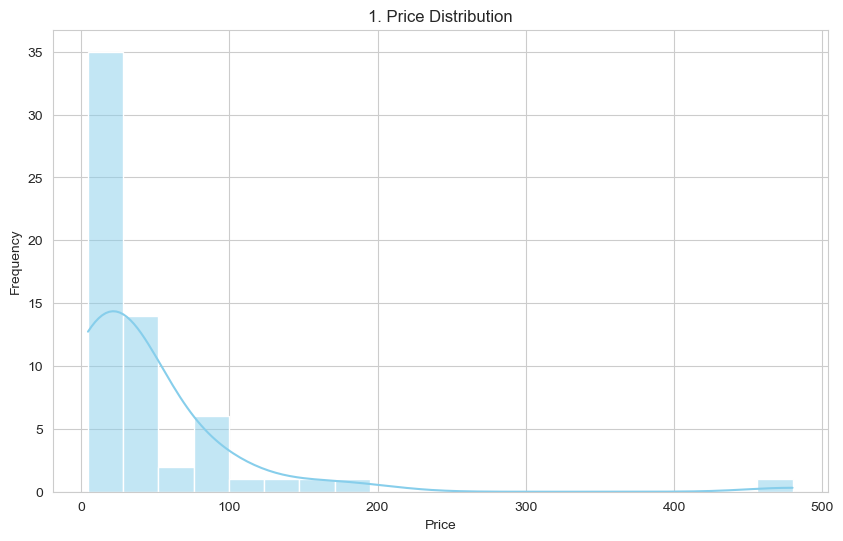

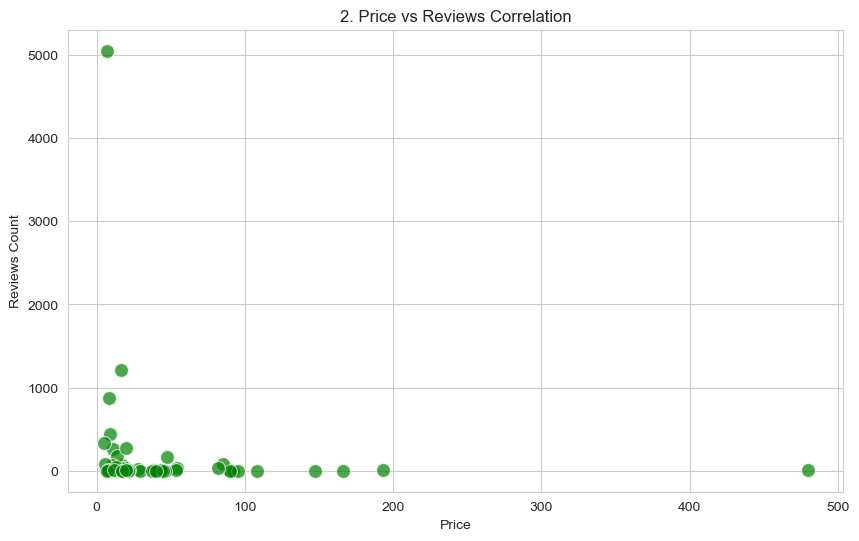

C:\Users\USER\AppData\Local\Temp\ipykernel_10824\3036953788.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Reviews', y='Name', data=top_5, palette='viridis')


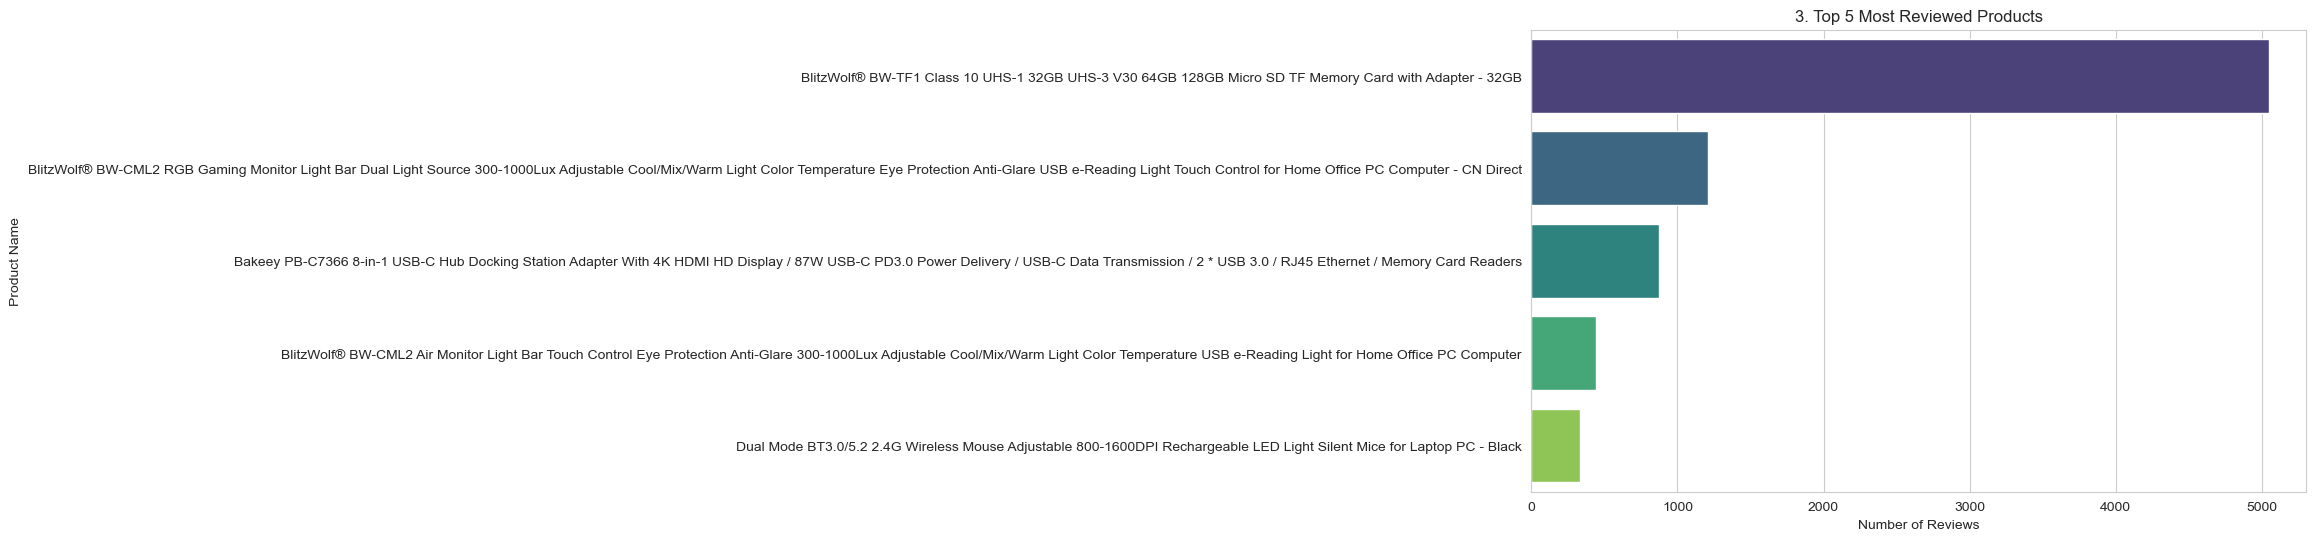

C:\Users\USER\AppData\Local\Temp\ipykernel_10824\3036953788.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Price_Segment', data=df, palette='pastel', order=['Low Budget', 'Mid Range', 'Premium'])


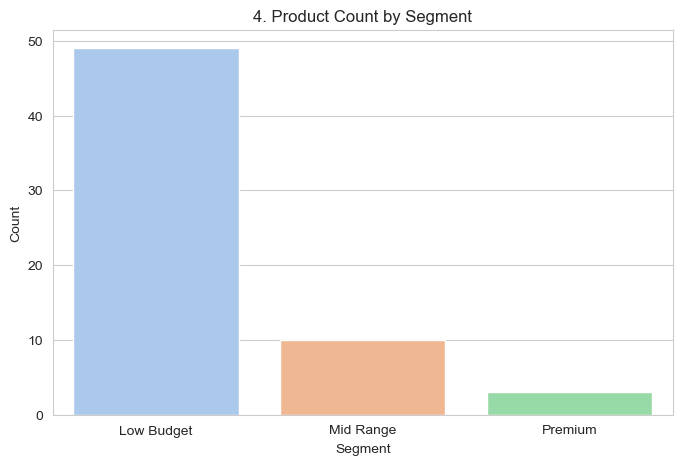

C:\Users\USER\AppData\Local\Temp\ipykernel_10824\3036953788.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Price_Segment', y='Est_Revenue', data=df, estimator=sum, palette='magma', errorbar=None)


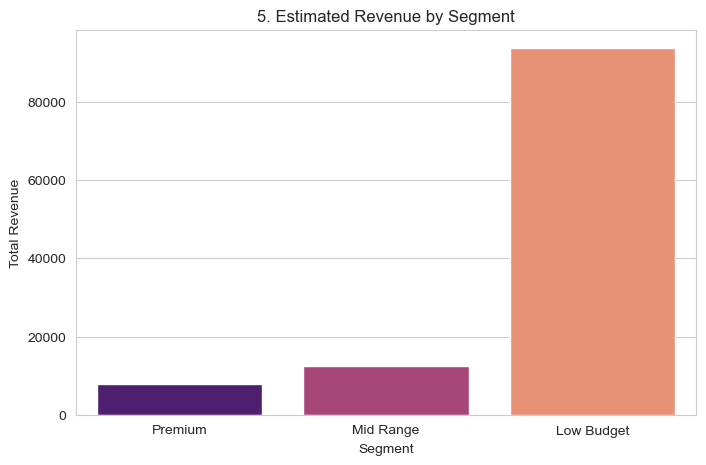

In [22]:
# --- STEP 2
sns.set_style("whitegrid")

# Graph 1: Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=20, kde=True, color='skyblue')
plt.title('1. Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Graph 2: Price vs Reviews Correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Reviews', data=df, color='green', s=100, alpha=0.7)
plt.title('2. Price vs Reviews Correlation')
plt.xlabel('Price')
plt.ylabel('Reviews Count')
plt.show()

# Graph 3: Top 5 Most Reviewed Products
plt.figure(figsize=(10, 6))
top_5 = df.nlargest(5, 'Reviews')
sns.barplot(x='Reviews', y='Name', data=top_5, palette='viridis')
plt.title('3. Top 5 Most Reviewed Products')
plt.xlabel('Number of Reviews')
plt.ylabel('Product Name')
plt.show()

# Graph 4: Product Count by Price Segment
plt.figure(figsize=(8, 5))
sns.countplot(x='Price_Segment', data=df, palette='pastel', order=['Low Budget', 'Mid Range', 'Premium'])
plt.title('4. Product Count by Segment')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.show()

# Graph 5: Estimated Revenue by Segment
plt.figure(figsize=(8, 5))
sns.barplot(x='Price_Segment', y='Est_Revenue', data=df, estimator=sum, palette='magma', errorbar=None)
plt.title('5. Estimated Revenue by Segment')
plt.xlabel('Segment')
plt.ylabel('Total Revenue')
plt.show()

## **Category 5 Men & Women Clothing**

In [24]:
# --- STEP 1: Load & Clean Data ---
file_name = "./banggood_men_women_clothing_data.csv"
df = pd.read_csv(file_name)

print(f"Original Data Size: {df.shape}")

# 1. Remove 'Category' and 'Rating' Columns if they exist
cols_to_drop = ['Category', 'Rating']
df.drop(columns=[c for c in cols_to_drop if c in df.columns], inplace=True)

# 2. Price Cleaning (Remove currency symbols like $, US, £, and commas)
# 'coerce' turns invalid parsing into NaN
df['Price'] = df['Price'].astype(str).str.replace('US', '').str.replace('$', '').str.replace(',', '').str.replace('£', '')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# 3. Reviews Cleaning (Extract digits only)
df['Reviews'] = df['Reviews'].astype(str).str.extract(r'(\d+)').astype(float).fillna(0)

# 4. Remove Empty Rows (Drop rows where Price is missing)
df.dropna(subset=['Price'], inplace=True)

# 5. Feature Engineering (Create 2 New Columns)
# Feature A: Price Segment (Budget vs Premium)
def categorize_price(p):
    if p < 50: return 'Low Budget'
    elif p < 150: return 'Mid Range'
    else: return 'Premium'

df['Price_Segment'] = df['Price'].apply(categorize_price)

# Feature B: Estimated Revenue (Price * Review Count)
df['Est_Revenue'] = df['Price'] * df['Reviews']

# --- SAVE BACK TO SAME FILE (Overwrite) ---
df.to_csv(file_name, index=False)
print(f"Success! '{file_name}' has been updated with cleaned data.")
print(f"New Data Size: {df.shape}")
print("-" * 30)

Original Data Size: (43, 6)
Success! './banggood_men_women_clothing_data.csv' has been updated with cleaned data.
New Data Size: (43, 6)
------------------------------


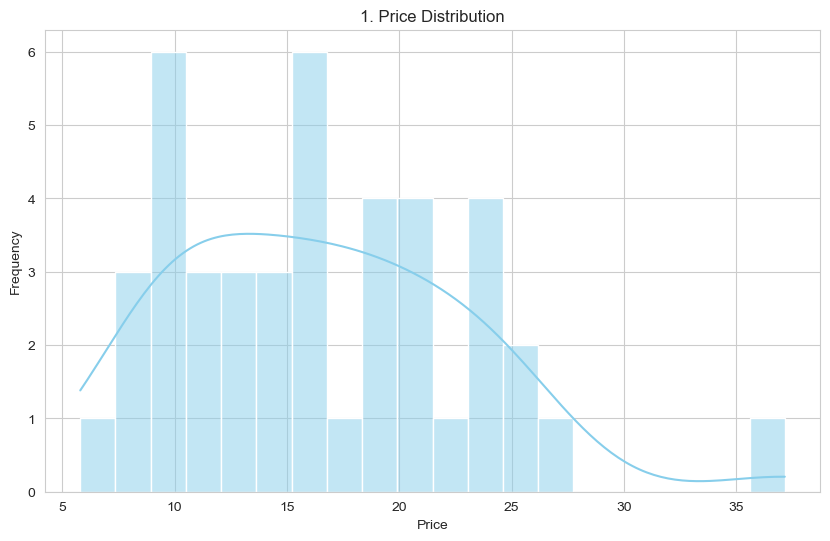

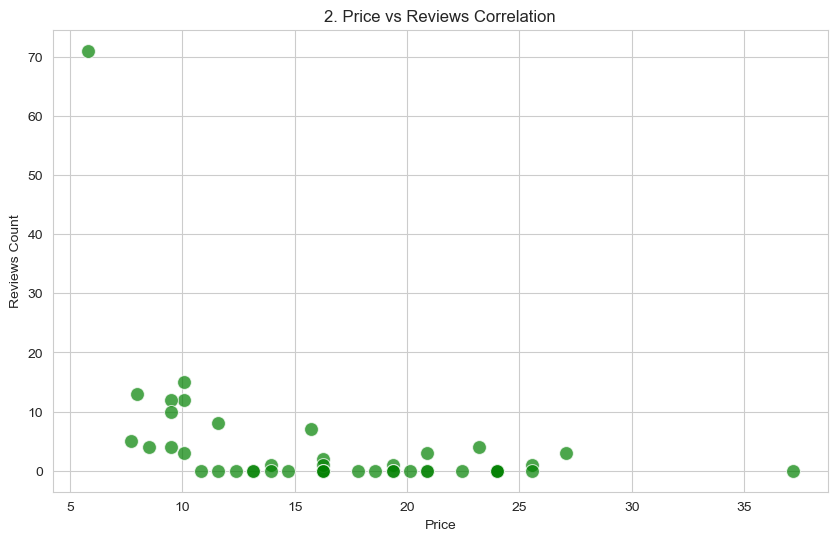

C:\Users\USER\AppData\Local\Temp\ipykernel_10824\3036953788.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Reviews', y='Name', data=top_5, palette='viridis')


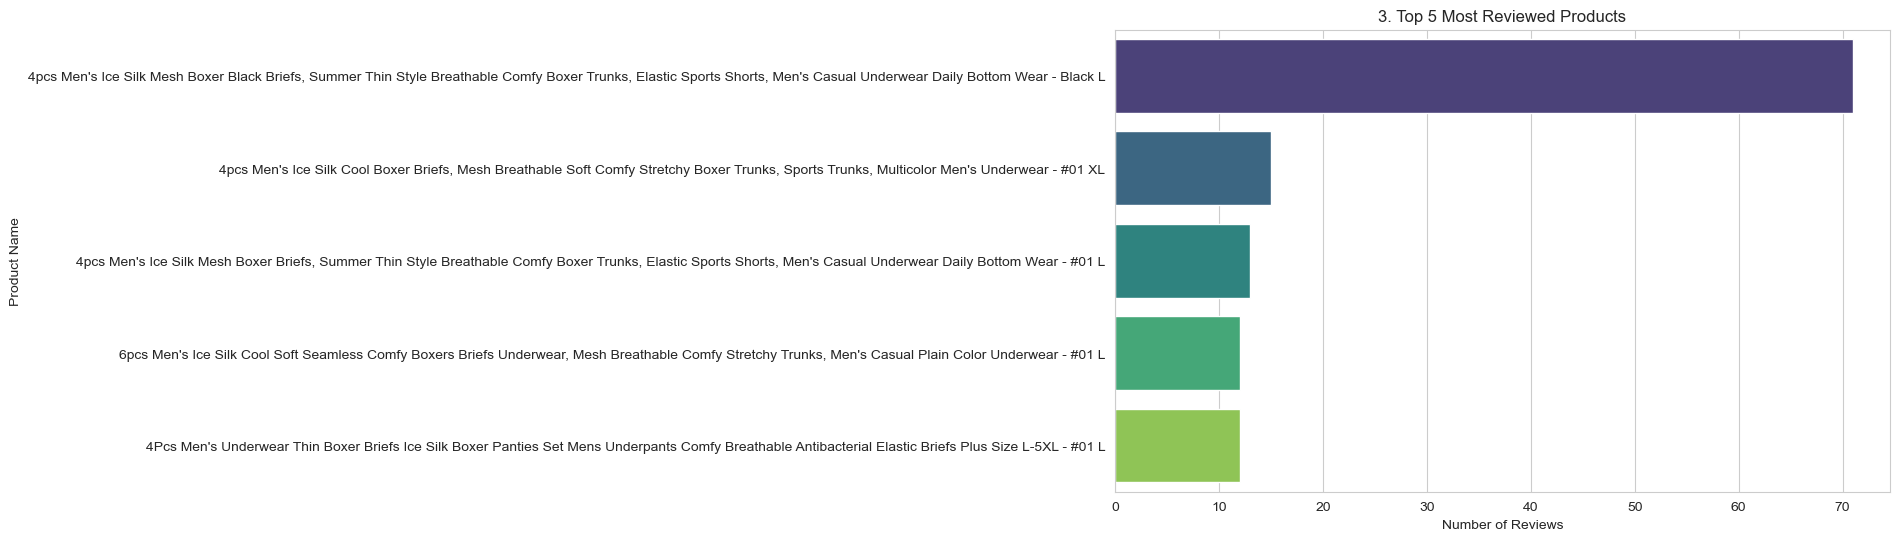

C:\Users\USER\AppData\Local\Temp\ipykernel_10824\3036953788.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Price_Segment', data=df, palette='pastel', order=['Low Budget', 'Mid Range', 'Premium'])


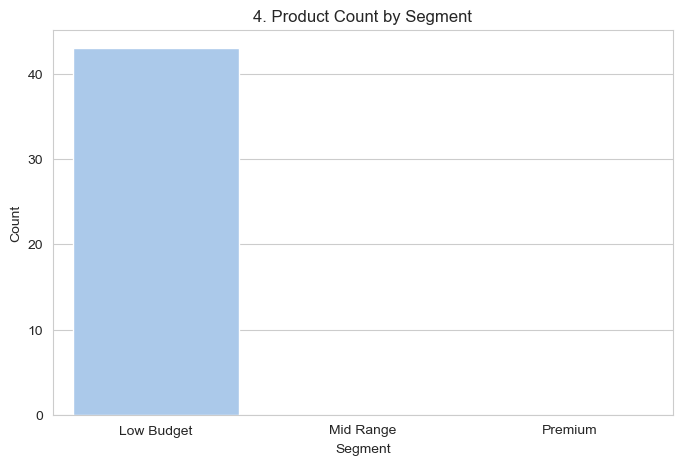

C:\Users\USER\AppData\Local\Temp\ipykernel_10824\3036953788.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Price_Segment', y='Est_Revenue', data=df, estimator=sum, palette='magma', errorbar=None)


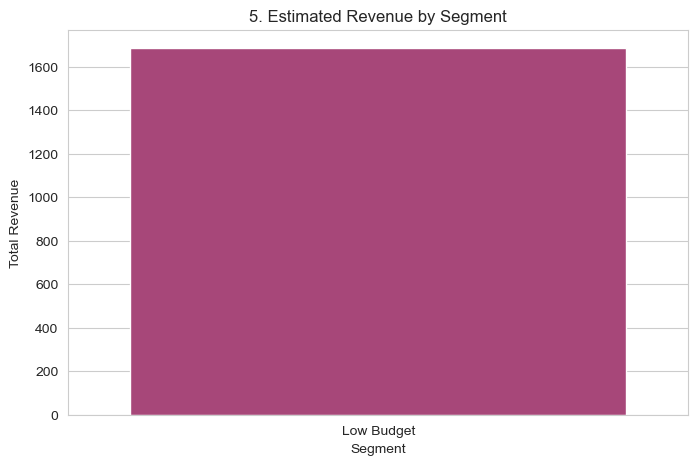

In [25]:
# --- STEP 2
sns.set_style("whitegrid")

# Graph 1: Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=20, kde=True, color='skyblue')
plt.title('1. Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Graph 2: Price vs Reviews Correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Reviews', data=df, color='green', s=100, alpha=0.7)
plt.title('2. Price vs Reviews Correlation')
plt.xlabel('Price')
plt.ylabel('Reviews Count')
plt.show()

# Graph 3: Top 5 Most Reviewed Products
plt.figure(figsize=(10, 6))
top_5 = df.nlargest(5, 'Reviews')
sns.barplot(x='Reviews', y='Name', data=top_5, palette='viridis')
plt.title('3. Top 5 Most Reviewed Products')
plt.xlabel('Number of Reviews')
plt.ylabel('Product Name')
plt.show()

# Graph 4: Product Count by Price Segment
plt.figure(figsize=(8, 5))
sns.countplot(x='Price_Segment', data=df, palette='pastel', order=['Low Budget', 'Mid Range', 'Premium'])
plt.title('4. Product Count by Segment')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.show()

# Graph 5: Estimated Revenue by Segment
plt.figure(figsize=(8, 5))
sns.barplot(x='Price_Segment', y='Est_Revenue', data=df, estimator=sum, palette='magma', errorbar=None)
plt.title('5. Estimated Revenue by Segment')
plt.xlabel('Segment')
plt.ylabel('Total Revenue')
plt.show()